# Time Series Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from pmdarima import auto_arima, ARIMA, model_selection
from prophet import Prophet
from prophet.plot import plot_cross_validation_metric
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import ParameterGrid
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import pandas as pd, requests, yfinance as yf
from pathlib import Path

In [2]:
df_train=pd.read_csv("1120_2newLABELS_train.csv")
df_test=pd.read_csv("1120_2newLABELS_test.csv")
df_train['time']=pd.to_datetime(df_train['time'])
df_test['time']=pd.to_datetime(df_test['time'])
df_full=pd.concat([df_train, df_test], ignore_index=True)

### Plotting the time series data

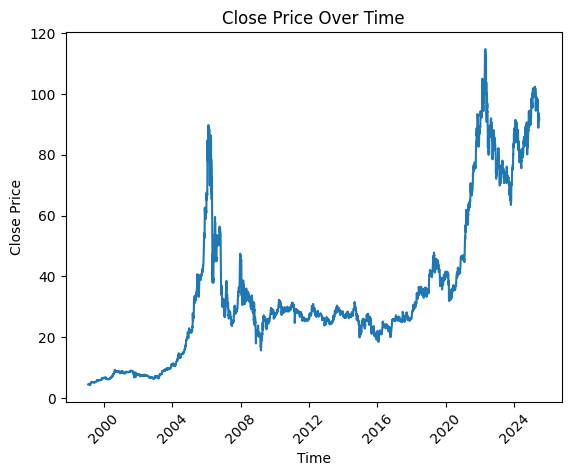

In [3]:
sns.lineplot(data=df_full, x='time', y='close')
plt.title('Close Price Over Time')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_19644\264640688.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.plot(df_full.set_index('time')['close'].resample('Y').mean())


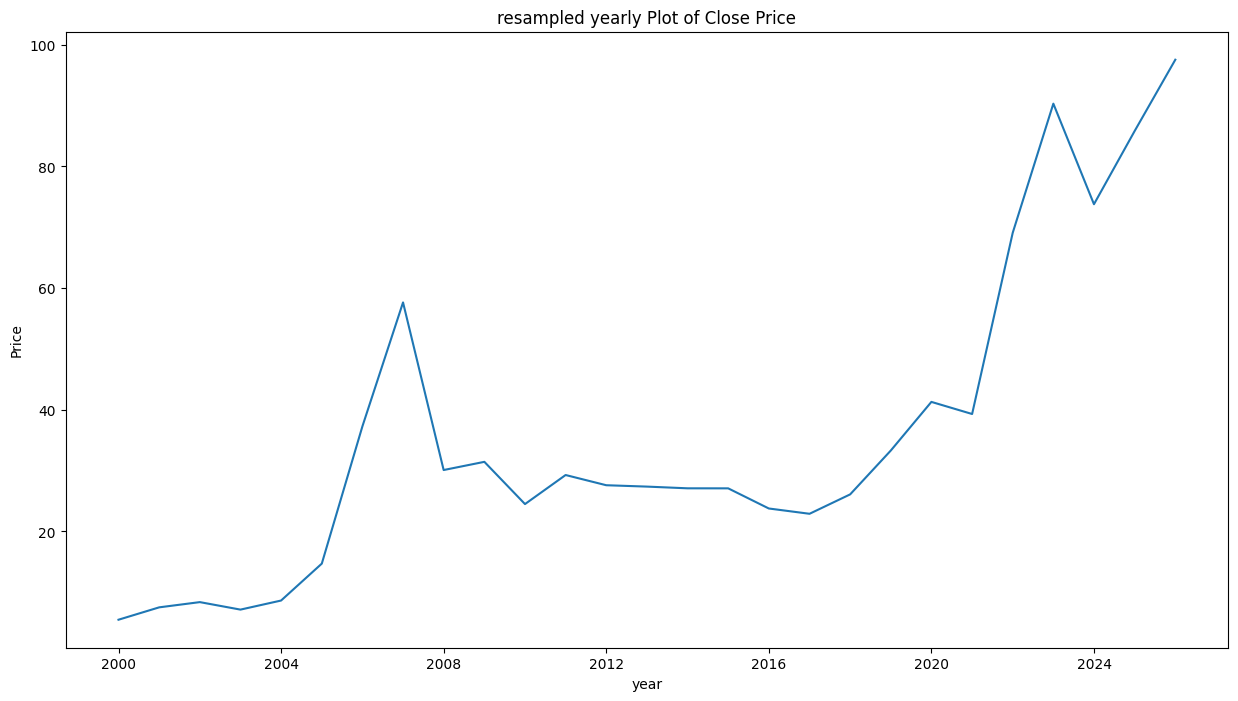

In [4]:
plt.figure(figsize=(15, 8))
plt.plot(df_full.set_index('time')['close'].resample('Y').mean())
plt.title('resampled yearly Plot of Close Price')
plt.xlabel('year')
plt.ylabel('Price')
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_2252\3209672008.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(df_full.set_index('time')['close'].resample('M').mean())


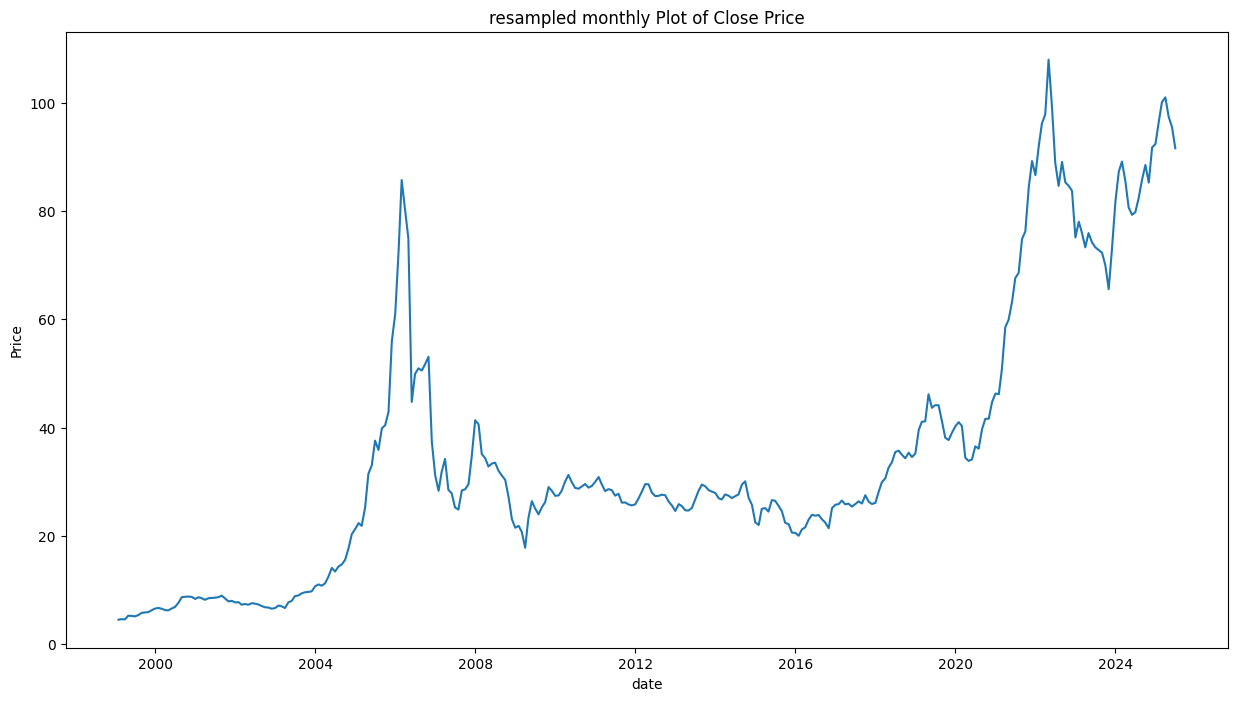

In [5]:
plt.figure(figsize=(15, 8))
plt.plot(df_full.set_index('time')['close'].resample('M').mean())
plt.title('resampled monthly Plot of Close Price')
plt.xlabel('date')
plt.ylabel('Price')
plt.show()

In [6]:
df=df_full.copy()
df.set_index('time', inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_19644\973155941.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_plot(df['close'][df.index<'1/1/2010'].resample('M').mean(),


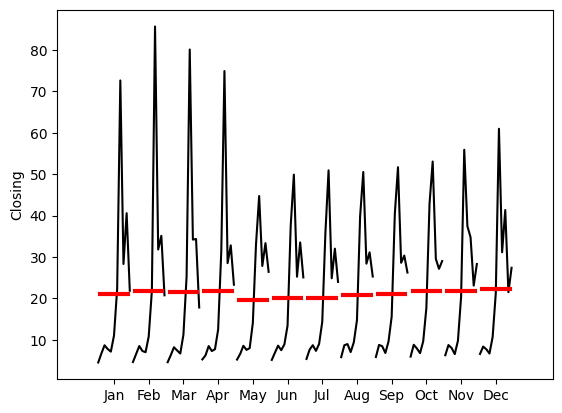

In [7]:
month_plot(df['close'][df.index<'1/1/2010'].resample('M').mean(),
           ylabel = 'Closing')
plt.show()

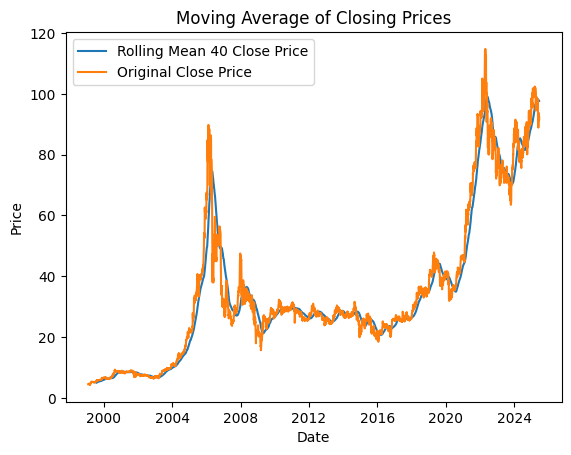

In [8]:

df['rolling_mean_close_30'] = df['close'].rolling(window=100).mean()

plt.plot(df['rolling_mean_close_30'],label='Rolling Mean 40 Close Price')
plt.plot(df['close'], label='Original Close Price')
plt.title('Moving Average of Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()






### Autocorrelation and Partial Autocorrelation Plots

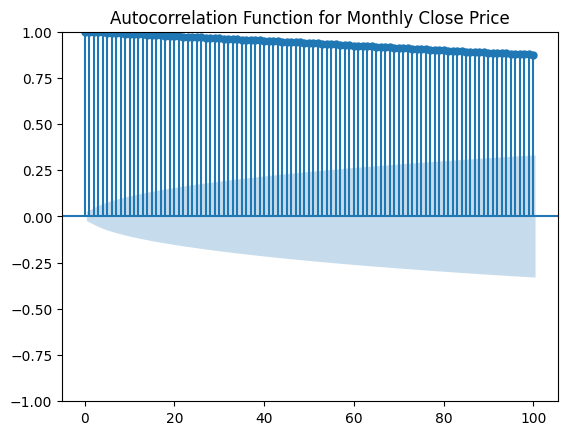

In [9]:
plot_acf(df['close'], lags=100)
plt.title('Autocorrelation Function for Monthly Close Price')
plt.show()



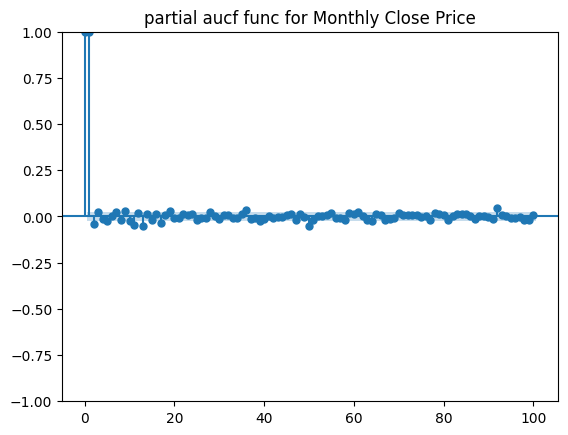

In [10]:
plot_pacf(df['close'], lags=100)
plt.title('partial aucf func for Monthly Close Price')
plt.show()

### Decomposition

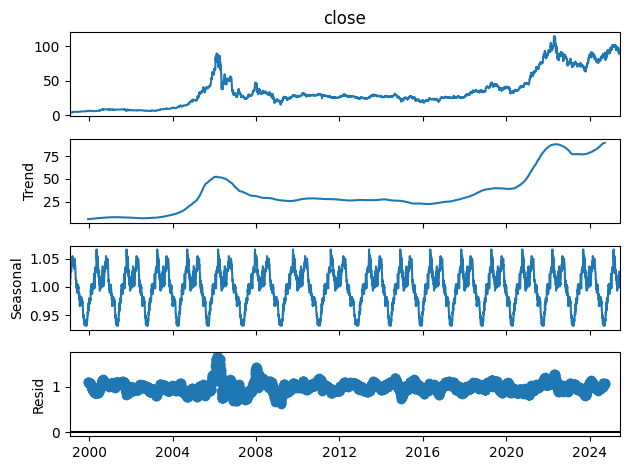

In [11]:
# decompostoin mulitplicative
decomposition = seasonal_decompose(df['close'],model = 'mul',period = 365)
fig = decomposition.plot()
plt.show()

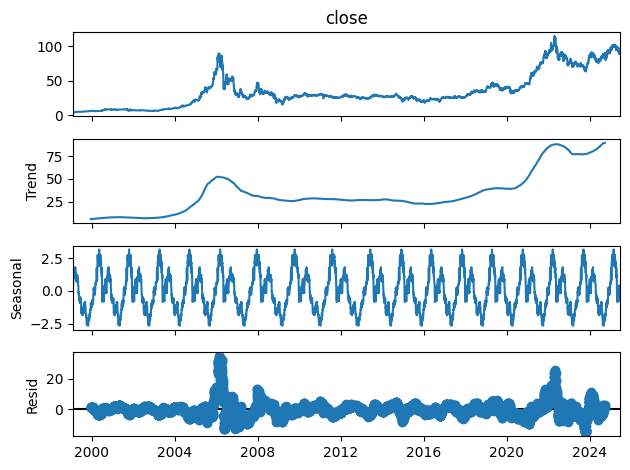

In [12]:
# decompostoin additive
decomposition = seasonal_decompose(df['close'],model = 'additive',period = 365)
fig = decomposition.plot()
plt.show()

#### We can conclude that the decompositi

# Exponential Smoothing Family

In [9]:
print(df_train)
train,test=df_train.set_index('time')['close'],df_test.set_index('time')['close']

           time       open       high        low      close  ActionH_1  \
0    1999-01-31   4.492385   4.630035   4.492385   4.492385        2.0   
1    1999-02-01   4.517412   4.761427   4.498642   4.517412        2.0   
2    1999-02-02   4.517412   4.517412   4.517412   4.517412        2.0   
3    1999-02-03   4.517412   4.517412   4.517412   4.517412        2.0   
4    1999-02-07   4.561210   4.630035   4.536182   4.561210        2.0   
...         ...        ...        ...        ...        ...        ...   
5324 2021-12-26  88.269633  88.769744  87.394438  87.519466        1.0   
5325 2021-12-27  87.394438  87.894556  86.769299  86.894327        2.0   
5326 2021-12-28  87.519466  89.394883  87.394438  89.394883        2.0   
5327 2021-12-29  89.394883  90.270072  87.519466  88.144605        2.0   
5328 2021-12-30  88.269633  89.769973  87.144376  88.644716        2.0   

      ActionH_2  
0           2.0  
1           2.0  
2           2.0  
3           2.0  
4           2.0  
...

In [32]:
# Create a Simple Exponential Smoothing model using the training data.
model_simple = SimpleExpSmoothing(train).fit()

# Use the fitted model to forecast future values.
# The forecast is made for the same length as the 'test' data set.
predictions_simple = model_simple.forecast(len(test))

c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


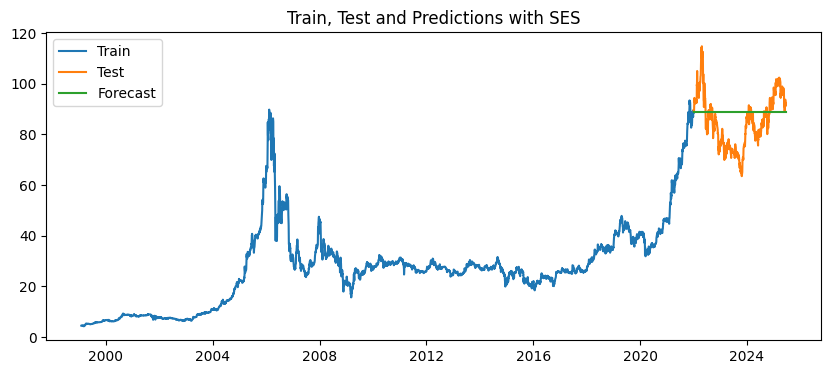

In [41]:
# SES (ONLY LVL)
model_simple = SimpleExpSmoothing(train).fit()
raw_forecast = model_simple.forecast(len(test))          
raw_forecast.index=test.index
plt.figure(figsize=(10, 4))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(raw_forecast, label='Forecast')
plt.title("Train, Test and Predictions with SES")
plt.legend()
plt.show()




In [42]:
from math import sqrt


# Calculating the MAE, RMSE, and MAPE
# between the test values and our prediction values
mae = mean_absolute_error(test, raw_forecast)
rmse = sqrt(mean_squared_error(test, raw_forecast))
mape = mean_absolute_percentage_error(test, raw_forecast)

print(f"The MAE is {mae:.2f}")
print(f"The RMSE is {rmse:.2f}")
print(f"The MAPE is {100 * mape:.2f} %")

The MAE is 8.77
The RMSE is 10.67
The MAPE is 10.88 %


c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


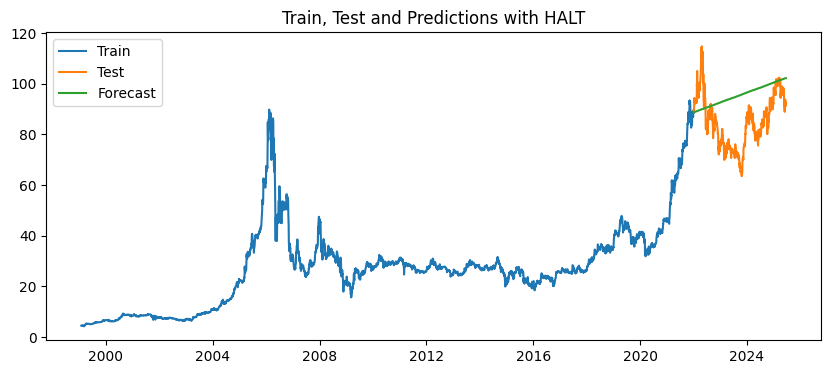

In [44]:
# halt (trnd only)
model_double = ExponentialSmoothing(train,
                                    trend = 'add',
                                    seasonal = None).fit()
raw_forecast = model_double.forecast(len(test))          
raw_forecast.index=test.index
plt.figure(figsize=(10, 4))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(raw_forecast, label='Forecast')
plt.title("Train, Test and Predictions with HALT")
plt.legend()
plt.show()





In [45]:
from math import sqrt


# Calculating the MAE, RMSE, and MAPE
# between the test values and our prediction values
mae = mean_absolute_error(test, raw_forecast)
rmse = sqrt(mean_squared_error(test, raw_forecast))
mape = mean_absolute_percentage_error(test, raw_forecast)

print(f"The MAE is {mae:.2f}")
print(f"The RMSE is {rmse:.2f}")
print(f"The MAPE is {100 * mape:.2f} %")

The MAE is 12.55
The RMSE is 14.66
The MAPE is 15.82 %


c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an ex

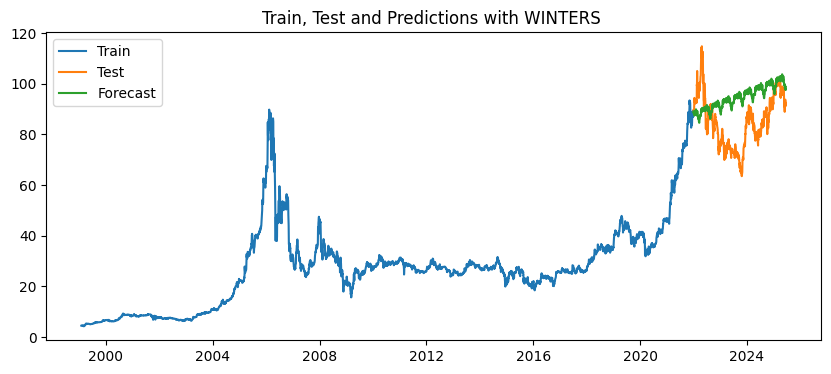

In [56]:
# WINTERS (trnd AND SEASONALITY)
model_triple = ExponentialSmoothing(train,
                                    trend = 'add',
                                    seasonal = "mul",
                                    seasonal_periods = 100).fit()
raw_forecast = model_triple.forecast(len(test))          
raw_forecast.index=test.index
plt.figure(figsize=(10, 4))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(raw_forecast, label='Forecast')
plt.title("Train, Test and Predictions with WINTERS ")
plt.legend()
plt.show()



In [57]:
from math import sqrt


# Calculating the MAE, RMSE, and MAPE
# between the test values and our prediction values
mae = mean_absolute_error(test, raw_forecast)
rmse = sqrt(mean_squared_error(test, raw_forecast))
mape = mean_absolute_percentage_error(test, raw_forecast)

print(f"The MAE is {mae:.2f}")
print(f"The RMSE is {rmse:.2f}")
print(f"The MAPE is {100 * mape:.2f} %")

The MAE is 12.14
The RMSE is 14.24
The MAPE is 15.27 %


### even though WINTERS is much more complex since it adds trend and seasonality, but in our case Simple Exponential Smoothing with level naively worked better

# ARIMA Family Models

In [58]:
# Function to assess model and visualize output
def model_assessment(train, test, predictions, chart_title):
  # Set the size of the plot to 10 inches by 4 inches
  plt.figure(figsize = (10,4))
  # Plot the train, test, and forecast data
  plt.plot(train, label = 'Train')
  plt.plot(test, label = 'Test')
  plt.plot(predictions, label = "Forecast")
  # add title and legend to the plot
  plt.title(f"Train, Test and Predictions with {chart_title}")
  plt.legend()
  plt.show()

  # Calculating the MAE, RMSE, and MAPE
  mae = mean_absolute_error(test, predictions)
  rmse = mean_squared_error(test, predictions, squared = False)
  mape = mean_absolute_percentage_error(test, predictions)

  # Print the calculated error metrics
  print(f"The MAE is {mae:.2f}")
  print(f"The RMSE is {rmse:.2f}")
  print(f"The MAPE is {100 * mape:.2f} %")

# Function to plot the future
def plot_future(y, forecast, title):
  # Set the size of the plot to 10 inches by 4 inches
  plt.figure(figsize = (10,4))
  # Plot the train and forecast data
  plt.plot(y, label = 'Train')
  plt.plot(forecast, label = "Forecast")
  # add title and legend to the plot
  plt.title(f"Train and Forecast with {title}")
  plt.legend()
  plt.show()

In [61]:
#ARIMA without seasonality or exogenous variables (no sarimax)
model = auto_arima(train,
                   seasonal = False)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5329
Model:               SARIMAX(5, 1, 2)   Log Likelihood               -5826.238
Date:                Fri, 20 Jun 2025   AIC                          11670.476
Time:                        23:35:43   BIC                          11729.703
Sample:                             0   HQIC                         11691.168
                               - 5329                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0394      0.028      1.427      0.154      -0.015       0.093
ar.L1         -0.6828      0.010    -68.562      0.000      -0.702      -0.663
ar.L2         -0.8384      0.009    -90.929      0.000      -0.856      -0.820
ar.L3          0.0478      0.006      8.270      0.000       0.036       0.059
ar.L4          0.0104      0.005      1.938      0.053      -0.000       0.021
ar.L5         -0.0364      0.005     -7.778      0.000      -0.046      -0.027
ma.L1          0.7733      0.009     82.845      0.000       0.755       0.792
ma.L2          0.8905      0.009    101.832      0.000       0.873       0.908
sigma2         0.5215      0.003    195.782      0.000       0.516       0.527
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            224075.08
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.47   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        34.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
predictions_arima = model.predict(n_periods = len(test))
predictions_arima.index=    test.index
predictions_arima


c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


time
2022-01-02     88.308893
2022-01-03     88.539386
2022-01-04     88.622798
2022-01-05     88.446620
2022-01-06     88.525670
                 ...    
2025-06-11    101.922796
2025-06-12    101.938543
2025-06-15    101.954289
2025-06-16    101.970036
2025-06-17    101.985783
Length: 858, dtype: float64

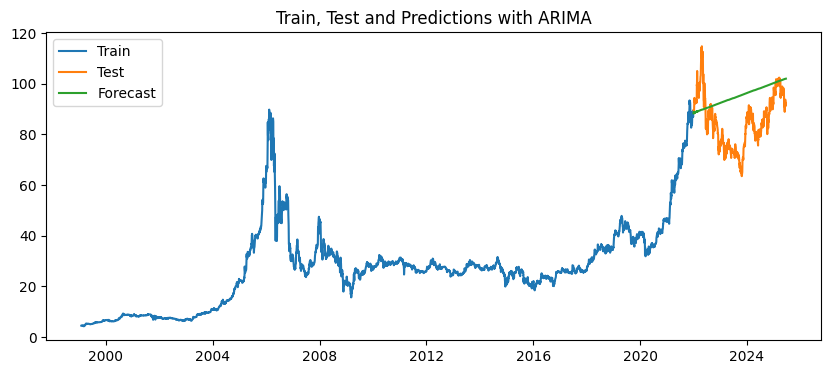

The MAE is 12.41
The RMSE is 14.52
The MAPE is 15.65 %


c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [63]:
model_assessment(train, test, predictions_arima, "ARIMA")

In [65]:
#Sarima with seasonality and no exogenous variables (no sarimax)

model_sarima = auto_arima(train,
                          m = 7)
model_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5329
Model:               SARIMAX(5, 1, 2)   Log Likelihood               -5826.238
Date:                Fri, 20 Jun 2025   AIC                          11670.476
Time:                        23:55:46   BIC                          11729.703
Sample:                             0   HQIC                         11691.168
                               - 5329                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0394      0.028      1.427      0.154      -0.015       0.093
ar.L1         -0.6828      0.010    -68.562      0.000      -0.702      -0.663
ar.L2         -0.8384      0.009    -90.929      0.000      -0.856      -0.820
ar.L3          0.0478      0.006      8.270      0.000       0.036       0.059
ar.L4          0.0104      0.005      1.938      0.053      -0.000       0.021
ar.L5         -0.0364      0.005     -7.778      0.000      -0.046      -0.027
ma.L1          0.7733      0.009     82.845      0.000       0.755       0.792
ma.L2          0.8905      0.009    101.832      0.000       0.873       0.908
sigma2         0.5215      0.003    195.782      0.000       0.516       0.527
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            224075.08
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.47   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        34.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [66]:
predictions_arima = model_sarima.predict(n_periods = len(test))
predictions_arima.index=    test.index
predictions_arima

c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


time
2022-01-02     88.308893
2022-01-03     88.539386
2022-01-04     88.622798
2022-01-05     88.446620
2022-01-06     88.525670
                 ...    
2025-06-11    101.922796
2025-06-12    101.938543
2025-06-15    101.954289
2025-06-16    101.970036
2025-06-17    101.985783
Length: 858, dtype: float64

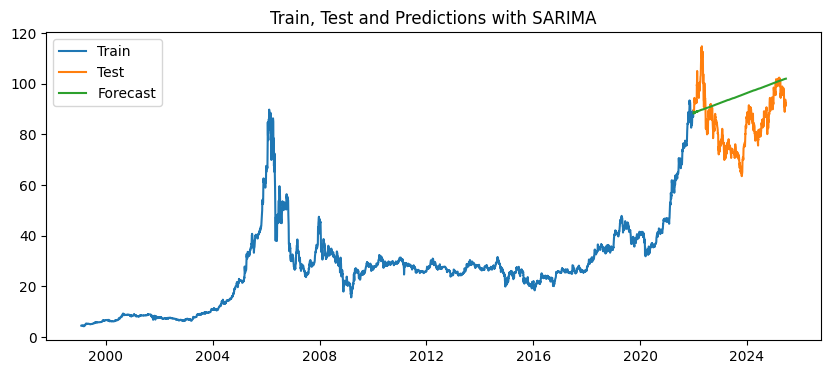

The MAE is 12.41
The RMSE is 14.52
The MAPE is 15.65 %


c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [67]:
model_assessment(train, test, predictions_arima, "SARIMA")

In [10]:
df_full_timed=df_full.set_index('time')
df_full_timed['close_shifted']= df_full_timed['close'].shift(1)
df_full_timed.dropna(inplace=True)
df_full_timed

,open,high,low,close,ActionH_1,ActionH_2,close_shifted
time,,,,,,,
1999-02-01,4.517412,4.761427,4.498642,4.517412,2.0,2.0,4.492385
1999-02-02,4.517412,4.517412,4.517412,4.517412,2.0,2.0,4.517412
1999-02-03,4.517412,4.517412,4.517412,4.517412,2.0,2.0,4.517412
1999-02-07,4.561210,4.630035,4.536182,4.561210,2.0,2.0,4.517412
1999-02-08,4.586237,4.592494,4.536182,4.586237,2.0,2.0,4.561210
...,...,...,...,...,...,...,...
2025-06-11,94.000000,95.200000,93.200000,93.700000,2.0,2.0,93.300000
2025-06-12,93.700000,93.800000,92.000000,92.600000,2.0,2.0,93.700000
2025-06-15,88.100000,92.000000,88.100000,91.200000,2.0,2.0,92.600000


In [11]:
test_days = 100 # Number of days to reserve for testing
# print(df_full_timed.reset_index()[df_full_timed.index >='3/1/2022'].set_index('time'))
exog_test, exog_train= df_full_timed.reset_index()[df_full_timed.index >='3/1/2022'].set_index('time'), df_full_timed.reset_index()[df_full_timed.index <'1/1/2022'].set_index('time')
exog_train= exog_train[['close_shifted','open']]
exog_test= exog_test[['close_shifted','open']]
exog_test.head()
print(exog_train)
print(exog_test)


            close_shifted       open
time                                
1999-02-01       4.492385   4.517412
1999-02-02       4.517412   4.517412
1999-02-03       4.517412   4.517412
1999-02-07       4.517412   4.561210
1999-02-08       4.561210   4.586237
...                   ...        ...
2021-12-26      88.269633  88.269633
2021-12-27      87.519466  87.394438
2021-12-28      86.894327  87.519466
2021-12-29      89.394883  89.394883
2021-12-30      88.144605  88.269633

[5328 rows x 2 columns]
            close_shifted        open
time                                 
2022-03-01     100.272296  100.272296
2022-03-02     100.022247  100.647386
2022-03-03      98.021802   98.771969
2022-03-06      97.896780   98.146830
2022-03-07      97.521691   97.771740
...                   ...         ...
2025-06-11      93.300000   94.000000
2025-06-12      93.700000   93.700000
2025-06-15      92.600000   88.100000
2025-06-16      91.200000   91.200000
2025-06-17      92.600000   92.600000


In [12]:
#sarimax with seasonality and exogenous variables (sarimax)
# print(train[train.index>='2022-03-01':])
print(exog_train)
model_sarimax = auto_arima(df_full_timed.loc[:'2022-01-01','close'],
                           m = 5,
                           X = exog_train
                           )

model_sarimax.summary()

            close_shifted       open
time                                
1999-02-01       4.492385   4.517412
1999-02-02       4.517412   4.517412
1999-02-03       4.517412   4.517412
1999-02-07       4.517412   4.561210
1999-02-08       4.561210   4.586237
...                   ...        ...
2021-12-26      88.269633  88.269633
2021-12-27      87.519466  87.394438
2021-12-28      86.894327  87.519466
2021-12-29      89.394883  89.394883
2021-12-30      88.144605  88.269633

[5328 rows x 2 columns]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 5328
Model:             SARIMAX(2, 0, 2)x(0, 0, [1], 5)   Log Likelihood               -4808.569
Date:                             Sun, 22 Jun 2025   AIC                           9635.138
Time:                                     14:04:17   BIC                           9694.364
Sample:                                          0   HQIC                          9655.829
                                            - 5328                                         
Covariance Type:                               opg                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept         0.0165      0.057      0.289      0.772      -0.095       0.128
close_shifted     0.2131      0.004     47.387      0.000       0.204       0.222
open              0.7872      0.004    177.022      0.000       0.778       0.796
ar.L1            -0.6796      0.007    -95.395      0.000      -0.694      -0.666
ar.L2            -0.8934      0.006   -148.333      0.000      -0.905      -0.882
ma.L1             0.7121      0.009     80.167      0.000       0.695       0.729
ma.L2             0.8518      0.007    115.221      0.000       0.837       0.866
ma.S.L5          -0.0090      0.005     -1.913      0.056      -0.018       0.000
sigma2            0.3559      0.002    190.484      0.000       0.352       0.360
===================================================================================
Ljung-Box (L1) (Q):                   0.72   Jarque-Bera (JB):            188953.39
Prob(Q):                              0.40   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        32.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
print(exog_test)
predictions_arima = model_sarimax.predict(n_periods = len(df_full_timed.loc['2022-03-01':,'close']) , X = exog_test)
predictions_arima.index=    df_full_timed.loc['2022-03-01':,'close'].index
df_tosave=df_full_timed.loc['2022-03-01':].copy()
df_tosave['close_pred']=predictions_arima.values
df_tosave.to_csv('predictions_arima_close.csv', index=True)
print(predictions_arima.values)
print(type(predictions_arima))
print(mean_absolute_percentage_error(df_tosave['close'], df_tosave['close_pred']))


            close_shifted        open
time                                 
2022-03-01     100.272296  100.272296
2022-03-02     100.022247  100.647386
2022-03-03      98.021802   98.771969
2022-03-06      97.896780   98.146830
2022-03-07      97.521691   97.771740
...                   ...         ...
2025-06-11      93.300000   94.000000
2025-06-12      93.700000   93.700000
2025-06-15      92.600000   88.100000
2025-06-16      91.200000   91.200000
2025-06-17      92.600000   92.600000

[817 rows x 2 columns]
[100.25135213 100.64136485  98.63833662  98.06768778  97.80191998
  96.22152202  96.89396376  96.27005173  97.27396041  96.55814241
  94.32134253  95.17446134  98.03240087  99.50422886  99.4510622
  98.93605309  97.12230846  98.46116451  97.60279676  99.3052908
 100.26736381 100.71100567  99.91325879 101.02271423 100.58686579
 100.80022135 101.11035744 101.68145884 102.91045103 103.4936533
 104.99775622 107.82273481 105.67423512 107.98341148 111.07889342
 114.47828784 110.19106

c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


time
2022-03-01    100.251352
2022-03-02    100.641365
2022-03-03     98.638337
2022-03-06     98.067688
2022-03-07     97.801920
                 ...    
2025-06-11     93.888561
2025-06-12     93.737654
2025-06-15     89.094884
2025-06-16     91.236820
2025-06-17     92.637287
Length: 817, dtype: float64


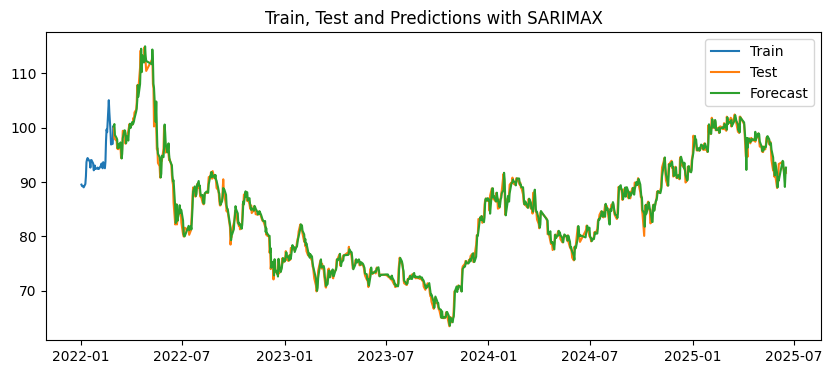

The MAE is 0.84
The RMSE is 1.17
The MAPE is 0.99 %


c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [129]:
print(predictions_arima)
model_assessment(df_full_timed.loc['2022-01-01':'2022-03-01':,'close'], df_full_timed.loc['2022-03-01':,'close'], predictions_arima, "SARIMAX")

### Sarimax worked as expected much better since it adds exogenous variables which helped the he model to capture the trend and seasonality better. However, it is important to note that SARIMAX may not be suitable for all time series

# Machine Learning Regressors

In [21]:
# Regression Pipeline: Traditional ML + Deep Learning

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,root_mean_squared_error
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# ------------------- Load Data -------------------
df = df_full_timed.copy()
df.drop(columns=['ActionH_1', 'ActionH_2'], inplace=True)

# ------------------- Feature Engineering -------------------
df['return_1d']        = df['close'].pct_change()
df['close_lag_1']      = df['close'].shift(1)
df['close_lag_2']      = df['close'].shift(2)
df['close_lag_3']      = df['close'].shift(3)
df['rolling_mean_5']   = df['close'].rolling(5).mean()
df['rolling_std_5']    = df['close'].rolling(5).std()
df['rolling_mean_10']  = df['close'].rolling(10).mean()
df['rolling_std_10']   = df['close'].rolling(10).std()
df['high_low_range']   = df['high'] - df['low']
df['open_close_diff']  = df['open'] - df['close']
df.dropna(inplace=True)

# ------------------- Split -------------------
train_end = pd.Timestamp("2022-01-01")
val_end = pd.Timestamp("2025-01-01")
train_df = df[df.index < train_end]
val_df = df[(df.index >= train_end) & (df.index < val_end)]
test_df = df[df.index >= val_end]

features = [col for col in df.columns if col not in ['time', 'close']]
X_train, y_train = train_df[features], train_df['close']
X_val, y_val = val_df[features], val_df['close']
X_test, y_test = test_df[features], test_df['close']

# ------------------- ML Models -------------------
def evaluate(y_true, y_pred):
    return {
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': root_mean_squared_error(y_true, y_pred),
        'R2': r2_score(y_true, y_pred)
    }

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_metrics = evaluate(y_test, rf.predict(X_test))

xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
xgb_metrics = evaluate(y_test, xgb.predict(X_test))

svm = SVR()
svm.fit(X_train, y_train)
svm_metrics = evaluate(y_test, svm.predict(X_test))

# ------------------- Deep Learning -------------------
X_train_t = torch.tensor(X_train.values, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_val_t = torch.tensor(X_val.values, dtype=torch.float32)
y_val_t = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)
X_test_t = torch.tensor(X_test.values, dtype=torch.float32)
y_test_t = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=64, shuffle=True)

# ---- ANN ----
class ANN(nn.Module):
    def __init__(self, in_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(in_features, 64), nn.ReLU(),
            nn.Linear(64, 32), nn.ReLU(),
            nn.Linear(32, 1)
        )
    def forward(self, x):
        return self.model(x)

# ---- CNN ----
class CNN1D(nn.Module):
    def __init__(self, in_features):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(1, 32, 3, padding=1), nn.ReLU(),
            nn.Conv1d(32, 16, 3, padding=1), nn.ReLU()
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features * 16, 1)
        )
    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.conv(x)
        return self.fc(x)

# ---- LSTM ----
class LSTMModel(nn.Module):
    def __init__(self, in_features):
        super().__init__()
        self.lstm = nn.LSTM(input_size=in_features, hidden_size=32, batch_first=True)
        self.fc = nn.Linear(32, 1)
    def forward(self, x):
        x = x.unsqueeze(1)
        out, _ = self.lstm(x)
        return self.fc(out[:, -1])

# ---- GRU ----
class GRUModel(nn.Module):
    def __init__(self, in_features):
        super().__init__()
        self.gru = nn.GRU(input_size=in_features, hidden_size=32, batch_first=True)
        self.fc = nn.Linear(32, 1)
    def forward(self, x):
        x = x.unsqueeze(1)
        out, _ = self.gru(x)
        return self.fc(out[:, -1])

# ---- Train Function ----
def train_dl_model(model, loader, X_val, y_val, epochs=20):
    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    loss_fn = nn.MSELoss()
    for epoch in range(epochs):
        for xb, yb in loader:
            pred = model(xb)
            loss = loss_fn(pred, yb)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    model.eval()
    with torch.no_grad():
        pred = model(X_test_t).detach().numpy()
    return evaluate(y_test_t.numpy(), pred)

# Train & evaluate each
ann_metrics = train_dl_model(ANN(X_train.shape[1]), train_loader, X_val_t, y_val_t)
cnn_metrics = train_dl_model(CNN1D(X_train.shape[1]), train_loader, X_val_t, y_val_t)
lstm_metrics = train_dl_model(LSTMModel(X_train.shape[1]), train_loader, X_val_t, y_val_t)
gru_metrics = train_dl_model(GRUModel(X_train.shape[1]), train_loader, X_val_t, y_val_t)

# ---- Print All ----
print("Random Forest:", rf_metrics)
print("XGBoost:", xgb_metrics)
print("SVM:", svm_metrics)
print("ANN:", ann_metrics)
print("CNN:", cnn_metrics)
print("LSTM:", lstm_metrics)
print("GRU:", gru_metrics)


Random Forest: {'MAE': 5.231680438115323, 'RMSE': 5.8761036929688135, 'R2': -2.766973904469738}
XGBoost: {'MAE': 6.168112650003518, 'RMSE': 6.8253695966804555, 'R2': -4.082367402620238}
SVM: {'MAE': 16.950562562070054, 'RMSE': 17.83196831426143, 'R2': -33.69063721326058}
ANN: {'MAE': 0.255883, 'RMSE': 0.36260295, 'R2': 0.9856557846069336}
CNN: {'MAE': 0.39156863, 'RMSE': 0.6056664, 'R2': 0.9599796533584595}
LSTM: {'MAE': 66.29314, 'RMSE': 66.36223, 'R2': -479.45819091796875}
GRU: {'MAE': 61.06101, 'RMSE': 61.136024, 'R2': -406.7631530761719}


### EVEn though ANN is better here , but CNN was much more robust and gave good results over many RUNs  and I think it is better to use CNN for Time Series Forecasting for our case

# Proprophet Model

In [22]:
from datetime import datetime
df_profit=df.reset_index().rename(columns={'time': 'ds','close': 'y'})
df_profit['ds']=df_profit['ds'].dt.strftime("%m/%d/%Y")
df_profit

,ds,open,high,low,y,close_shifted,return_1d,close_lag_1,close_lag_2,close_lag_3,rolling_mean_5,rolling_std_5,rolling_mean_10,rolling_std_10,high_low_range,open_close_diff
0,02/16/1999,4.617521,4.648805,4.605007,4.617521,4.648805,-0.006729,4.648805,4.617521,4.617521,4.630035,0.017135,4.584985,0.053320,0.043797,0.0
1,02/17/1999,4.605007,4.623778,4.586237,4.605007,4.617521,-0.002710,4.617521,4.648805,4.617521,4.621275,0.016316,4.593745,0.047905,0.037541,0.0
2,02/21/1999,4.642548,4.655062,4.617521,4.642548,4.605007,0.008152,4.605007,4.617521,4.648805,4.626280,0.018561,4.606259,0.041691,0.037541,0.0
3,02/22/1999,4.630035,4.642548,4.617521,4.630035,4.642548,-0.002695,4.642548,4.605007,4.617521,4.628783,0.017917,4.617521,0.027981,0.025027,0.0
4,02/23/1999,4.605007,4.636291,4.561210,4.605007,4.630035,-0.005405,4.630035,4.642548,4.605007,4.620024,0.016316,4.621901,0.020657,0.075082,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6172,06/11/2025,94.000000,95.200000,93.200000,93.700000,93.300000,0.004287,93.300000,90.000000,90.400000,91.260000,2.122027,91.620000,1.592203,2.000000,0.3
6173,06/12/2025,93.700000,93.800000,92.000000,92.600000,93.700000,-0.011740,93.700000,93.300000,90.000000,92.000000,1.695582,91.670000,1.616615,1.800000,1.1
6174,06/15/2025,88.100000,92.000000,88.100000,91.200000,92.600000,-0.015119,92.600000,93.700000,93.300000,92.160000,1.537205,91.540000,1.594574,3.900000,-3.1
6175,06/16/2025,91.200000,93.400000,91.200000,92.600000,91.200000,0.015351,91.200000,92.600000,93.700000,92.680000,0.952365,91.700000,1.614517,2.200000,-1.4


In [23]:
# Building the Prophet model
m = Prophet(
    yearly_seasonality=True,     # Include yearly seasonality
    weekly_seasonality=True,     # Include weekly seasonality
    # holidays=holidays,           # Include holiday effects
    seasonality_mode="multiplicative",  # Use multiplicative seasonality
    # seasonality_prior_scale=10,  # Increase flexibility of seasonality
    # holidays_prior_scale=10,     # Increase impact of holidays
    # changepoint_prior_scale=0.05 # Control flexibility in detecting trend changes
)
# close_shifted	return_1d	close_lag_1	close_lag_2	close_lag_3	rolling_mean_5	rolling_std_5	rolling_mean_10	rolling_std_10	high_low_range	open_close_diff
# Add additional regressors (external factors) to the model
m.add_regressor("close_shifted")    # Whether it's a working day
m.add_regressor("return_1d")          # Temperature
m.add_regressor("close_lag_1")         # Apparent temperature
m.add_regressor("close_lag_2")           # Humidity
m.add_regressor("rolling_mean_5")     # Wind speed
m.add_regressor("rolling_std_5")  # Weather situation category 2
m.add_regressor("rolling_mean_10")  # Weather situation category 3
m.add_regressor("rolling_std_10")
m.add_regressor("high_low_range")
m.add_regressor("open_close_diff")
m.add_regressor("open")

# Fit the model to the data
m.fit(df_profit)

15:56:34 - cmdstanpy - INFO - Chain [1] start processing
15:56:46 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
## Regressor Coefficients
# regressor_coefficients() - used to extract and display the coefficients of the additional regressors added to the Prophet model.
# Positive coefficients indicate the regressor increases the target variable.
# Negative coefficients indicate the regressor decreases the target variable.
# The value of the coefficient represents the strength of the effect.

from prophet.utilities import regressor_coefficients
regressor_coefficients(m)

,regressor,regressor_mode,center,coef_lower,coef,coef_upper
0,close_shifted,multiplicative,35.318017,0.000009,0.000009,0.000009
1,return_1d,multiplicative,0.000646,0.000102,0.000102,0.000102
2,close_lag_1,multiplicative,35.318017,0.000009,0.000009,0.000009
3,close_lag_2,multiplicative,35.303773,-0.000017,-0.000017,-0.000017
4,rolling_mean_5,multiplicative,35.303835,-0.000012,-0.000012,-0.000012
5,rolling_std_5,multiplicative,0.508853,-0.000010,-0.000010,-0.000010
6,rolling_mean_10,multiplicative,35.268418,0.000025,0.000025,0.000025
7,rolling_std_10,multiplicative,0.728047,-0.000003,-0.000003,-0.000003
8,high_low_range,multiplicative,0.715976,-0.000027,-0.000027,-0.000027
9,open_close_diff,multiplicative,-0.005163,-0.024689,-0.024689,-0.024689


In [26]:
# Function to interpret the coefficient results
def interpret_prophet_coefficients(df):
    interpretations = []

    # Iterate through each row in the DataFrame 'df'
    for _, row in df.iterrows():
        regressor = row['regressor']  # Get the regressor name
        mode = row['regressor_mode']  # Get the regressor mode (multiplicative or additive)
        coef = row['coef']  # Get the coefficient value
        effect_type = 'increase' if coef > 0 else 'decrease'  # Determine if the effect is an increase or decrease

        # Generate interpretation based on the regressor mode
        if mode == 'multiplicative':
            interpretation = f"For each unit increase in {regressor}, the target variable is expected to {effect_type} by {abs(coef) * 100:.2f}% (multiplicatively)."
        elif mode == 'additive':
            interpretation = f"For each unit increase in {regressor}, the target variable changes by {coef:.2f} units (additively)."
        else:
            interpretation = f"Regressor {regressor} has an unrecognized mode '{mode}'."

        interpretations.append(interpretation)

    return interpretations

coefs = pd.DataFrame(regressor_coefficients(m))  # Get regressor coefficients from the Prophet model
interpretations = interpret_prophet_coefficients(coefs) # Generate interpretations based on coefficients

# Print each interpretation
for interpretation in interpretations:
    print(interpretation)

For each unit increase in close_shifted, the target variable is expected to increase by 0.00% (multiplicatively).
For each unit increase in return_1d, the target variable is expected to increase by 0.01% (multiplicatively).
For each unit increase in close_lag_1, the target variable is expected to increase by 0.00% (multiplicatively).
For each unit increase in close_lag_2, the target variable is expected to decrease by 0.00% (multiplicatively).
For each unit increase in rolling_mean_5, the target variable is expected to decrease by 0.00% (multiplicatively).
For each unit increase in rolling_std_5, the target variable is expected to decrease by 0.00% (multiplicatively).
For each unit increase in rolling_mean_10, the target variable is expected to increase by 0.00% (multiplicatively).
For each unit increase in rolling_std_10, the target variable is expected to decrease by 0.00% (multiplicatively).
For each unit increase in high_low_range, the target variable is expected to decrease by 0.0

In [27]:
from prophet.diagnostics import cross_validation

In [29]:
print(df_profit['ds'].min(), df_profit['ds'].max())
print(f"Total days: {(pd.to_datetime(df_profit['ds'].max()) - pd.to_datetime(df_profit['ds'].min())).days}")


01/01/2002 12/31/2024
Total days: 8400


In [30]:
from prophet.diagnostics import cross_validation

df_cv = cross_validation(
    model=m,
    initial='1095 days',  # 3 years
    period='180 days',    # step forward by 6 months
    horizon='365 days',   # forecast 1 year ahead
    parallel='threads',   # Use threads for Windows compatibility
    disable_tqdm=True     # Optional: disables progress bar
)


16:00:58 - cmdstanpy - INFO - Chain [1] start processing
16:00:59 - cmdstanpy - INFO - Chain [1] start processing
16:00:59 - cmdstanpy - INFO - Chain [1] start processing
16:00:59 - cmdstanpy - INFO - Chain [1] start processing
16:01:00 - cmdstanpy - INFO - Chain [1] start processing
16:01:00 - cmdstanpy - INFO - Chain [1] done processing
16:01:00 - cmdstanpy - INFO - Chain [1] start processing
16:01:00 - cmdstanpy - INFO - Chain [1] start processing
16:01:01 - cmdstanpy - INFO - Chain [1] start processing
16:01:01 - cmdstanpy - INFO - Chain [1] start processing
16:01:01 - cmdstanpy - INFO - Chain [1] start processing
16:01:01 - cmdstanpy - INFO - Chain [1] start processing
16:01:01 - cmdstanpy - INFO - Chain [1] start processing
16:01:01 - cmdstanpy - INFO - Chain [1] start processing
16:01:01 - cmdstanpy - INFO - Chain [1] done processing
16:01:01 - cmdstanpy - INFO - Chain [1] start processing
16:01:02 - cmdstanpy - INFO - Chain [1] done processing
16:01:02 - cmdstanpy - INFO - Chai

In [31]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2002-04-15,7.220436,7.217867,7.223009,7.220351,2002-04-14
1,2002-04-16,7.239217,7.236621,7.241776,7.239121,2002-04-14
2,2002-04-17,7.220441,7.217713,7.223049,7.220351,2002-04-14
3,2002-04-18,7.214187,7.211774,7.216748,7.214094,2002-04-14
4,2002-04-21,7.207906,7.205131,7.210548,7.207838,2002-04-14


In [32]:
from prophet.diagnostics import performance_metrics
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,38 days,0.000006,0.002439,0.001221,0.000032,0.000022,0.000032,0.998138
1,39 days,0.000006,0.002415,0.001220,0.000033,0.000022,0.000033,0.998138
2,40 days,0.000006,0.002384,0.001217,0.000033,0.000022,0.000033,0.998138
3,41 days,0.000006,0.002395,0.001225,0.000033,0.000022,0.000033,0.998138
4,42 days,0.000006,0.002385,0.001221,0.000033,0.000022,0.000033,0.998138
...,...,...,...,...,...,...,...,...
323,361 days,0.000028,0.005263,0.002623,0.000083,0.000026,0.000083,1.000000
324,362 days,0.000028,0.005295,0.002637,0.000083,0.000026,0.000083,1.000000
325,363 days,0.000028,0.005256,0.002623,0.000083,0.000027,0.000083,1.000000
326,364 days,0.000028,0.005244,0.002616,0.000082,0.000027,0.000082,1.000000


In [33]:
# RMSE and MAPE
rmse = round(performance_metrics(df_cv)['rmse'].mean(),0)
mape = round(performance_metrics(df_cv)['mape'].mean()* 100 ,2)
print(f"The RMSE is {rmse}")
print(f"The MAPE is {mape} %")

The RMSE is 0.0
The MAPE is 0.01 %


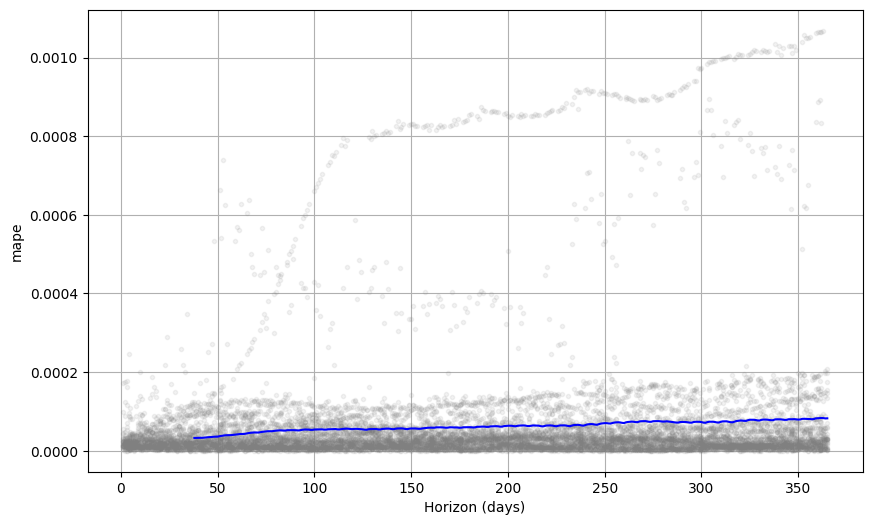

In [34]:
# Plotting the metrics over time
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv, metric = 'mape');

In [35]:
# Define the parameter grid to search
param_grid = {
    'changepoint_prior_scale': [0.05, 0.5],
    'seasonality_prior_scale': [10, 20],
    'holidays_prior_scale': [10, 20],
    'seasonality_mode' : ['additive', 'multiplicative']
}

In [36]:
# Generate all combinations of parameters
all_params = list(ParameterGrid(param_grid))
all_params

[{'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 10,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 10,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 20},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 10,
  'seasonality_mode': 'multiplicative',
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 10,
  'seasonality_mode': 'multiplicative',
  'seasonality_prior_scale': 20},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 20,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 20,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 20},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 20,
  'seasonality_mode': 'multiplicative',
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.05,
  'holidays_prio

In [42]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

# Placeholder for storing the results
tuning_results = []

print("Available columns in df_profit:", df_profit.columns)

# Parameter tuning loop
for i, params in enumerate(all_params):
    print(f"\nTraining model {i+1}/{len(all_params)} with params: {params}")
    
    # Initialize model with params
    m = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        
        **params
    )

    # Match these to actual df_profit columns
    for reg in [
        "close_shifted", "return_1d", "close_lag_1", "close_lag_2",
        "rolling_mean_5", "rolling_std_5", "rolling_mean_10",
        "rolling_std_10", "high_low_range", "open"
    ]:
        m.add_regressor(reg)


    # Fit model
    try:
        m.fit(df_profit)
    except Exception as e:
        print(f"Model {i+1} failed during fitting: {e}")
        continue

    # Cross-validation
    try:
        df_cv = cross_validation(
            model=m,
            period='90 days',     # more efficient than 15 for long time series
            initial='1095 days',  # use 3 years of data
            horizon='180 days',   # 6-month forecast
            parallel='threads',   # use threads (safer on Windows)
            disable_tqdm=True
        )
    except Exception as e:
        print(f"Model {i+1} failed during cross-validation: {e}")
        continue

    # Evaluate
    try:
        rmse = performance_metrics(df_cv)['rmse'].mean()
        tuning_results.append({"params": params, "rmse": rmse})
        print(f"Model {i+1} RMSE: {rmse:.4f}")
    except Exception as e:
        print(f"Model {i+1} failed during evaluation: {e}")
        continue


Available columns in df_profit: Index(['ds', 'open', 'high', 'low', 'y', 'close_shifted', 'return_1d',
       'close_lag_1', 'close_lag_2', 'close_lag_3', 'rolling_mean_5',
       'rolling_std_5', 'rolling_mean_10', 'rolling_std_10', 'high_low_range',
       'open_close_diff'],
      dtype='object')

Training model 1/16 with params: {'changepoint_prior_scale': 0.05, 'holidays_prior_scale': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


16:18:50 - cmdstanpy - INFO - Chain [1] start processing
16:18:54 - cmdstanpy - INFO - Chain [1] done processing
16:18:55 - cmdstanpy - INFO - Chain [1] start processing
16:18:56 - cmdstanpy - INFO - Chain [1] start processing
16:18:56 - cmdstanpy - INFO - Chain [1] start processing
16:18:56 - cmdstanpy - INFO - Chain [1] done processing
16:18:57 - cmdstanpy - INFO - Chain [1] start processing
16:18:57 - cmdstanpy - INFO - Chain [1] start processing
16:18:57 - cmdstanpy - INFO - Chain [1] done processing
16:18:57 - cmdstanpy - INFO - Chain [1] start processing
16:18:57 - cmdstanpy - INFO - Chain [1] start processing
16:18:57 - cmdstanpy - INFO - Chain [1] start processing
16:18:57 - cmdstanpy - INFO - Chain [1] start processing
16:18:57 - cmdstanpy - INFO - Chain [1] done processing
16:18:57 - cmdstanpy - INFO - Chain [1] start processing
16:18:57 - cmdstanpy - INFO - Chain [1] start processing
16:18:57 - cmdstanpy - INFO - Chain [1] start processing
16:18:57 - cmdstanpy - INFO - Chain

Model 1 RMSE: 0.4983

Training model 2/16 with params: {'changepoint_prior_scale': 0.05, 'holidays_prior_scale': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 20}


16:20:22 - cmdstanpy - INFO - Chain [1] start processing
16:20:25 - cmdstanpy - INFO - Chain [1] done processing
16:20:30 - cmdstanpy - INFO - Chain [1] start processing
16:20:31 - cmdstanpy - INFO - Chain [1] start processing
16:20:31 - cmdstanpy - INFO - Chain [1] done processing
16:20:32 - cmdstanpy - INFO - Chain [1] start processing
16:20:32 - cmdstanpy - INFO - Chain [1] start processing
16:20:32 - cmdstanpy - INFO - Chain [1] start processing
16:20:32 - cmdstanpy - INFO - Chain [1] start processing
16:20:32 - cmdstanpy - INFO - Chain [1] done processing
16:20:33 - cmdstanpy - INFO - Chain [1] done processing
16:20:33 - cmdstanpy - INFO - Chain [1] done processing
16:20:33 - cmdstanpy - INFO - Chain [1] start processing
16:20:33 - cmdstanpy - INFO - Chain [1] start processing
16:20:34 - cmdstanpy - INFO - Chain [1] start processing
16:20:34 - cmdstanpy - INFO - Chain [1] done processing
16:20:34 - cmdstanpy - INFO - Chain [1] start processing
16:20:34 - cmdstanpy - INFO - Chain [

Model 2 RMSE: 0.4985

Training model 3/16 with params: {'changepoint_prior_scale': 0.05, 'holidays_prior_scale': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


16:22:21 - cmdstanpy - INFO - Chain [1] start processing
16:22:24 - cmdstanpy - INFO - Chain [1] done processing
16:22:29 - cmdstanpy - INFO - Chain [1] start processing
16:22:30 - cmdstanpy - INFO - Chain [1] done processing
16:22:31 - cmdstanpy - INFO - Chain [1] start processing
16:22:31 - cmdstanpy - INFO - Chain [1] start processing
16:22:31 - cmdstanpy - INFO - Chain [1] start processing
16:22:31 - cmdstanpy - INFO - Chain [1] start processing
16:22:31 - cmdstanpy - INFO - Chain [1] start processing
16:22:32 - cmdstanpy - INFO - Chain [1] start processing
16:22:32 - cmdstanpy - INFO - Chain [1] done processing
16:22:32 - cmdstanpy - INFO - Chain [1] start processing
16:22:32 - cmdstanpy - INFO - Chain [1] start processing
16:22:32 - cmdstanpy - INFO - Chain [1] start processing
16:22:32 - cmdstanpy - INFO - Chain [1] done processing
16:22:32 - cmdstanpy - INFO - Chain [1] start processing
16:22:32 - cmdstanpy - INFO - Chain [1] start processing
16:22:32 - cmdstanpy - INFO - Chain

Model 3 RMSE: 0.5851

Training model 4/16 with params: {'changepoint_prior_scale': 0.05, 'holidays_prior_scale': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 20}


16:23:55 - cmdstanpy - INFO - Chain [1] start processing
16:23:58 - cmdstanpy - INFO - Chain [1] done processing
16:24:04 - cmdstanpy - INFO - Chain [1] start processing
16:24:05 - cmdstanpy - INFO - Chain [1] done processing
16:24:05 - cmdstanpy - INFO - Chain [1] start processing
16:24:05 - cmdstanpy - INFO - Chain [1] start processing
16:24:05 - cmdstanpy - INFO - Chain [1] start processing
16:24:06 - cmdstanpy - INFO - Chain [1] start processing
16:24:06 - cmdstanpy - INFO - Chain [1] start processing
16:24:06 - cmdstanpy - INFO - Chain [1] start processing
16:24:06 - cmdstanpy - INFO - Chain [1] start processing
16:24:06 - cmdstanpy - INFO - Chain [1] done processing
16:24:06 - cmdstanpy - INFO - Chain [1] start processing
16:24:07 - cmdstanpy - INFO - Chain [1] start processing
16:24:07 - cmdstanpy - INFO - Chain [1] start processing
16:24:07 - cmdstanpy - INFO - Chain [1] start processing
16:24:07 - cmdstanpy - INFO - Chain [1] done processing
16:24:07 - cmdstanpy - INFO - Chain

Model 4 RMSE: 0.5874

Training model 5/16 with params: {'changepoint_prior_scale': 0.05, 'holidays_prior_scale': 20, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


16:25:27 - cmdstanpy - INFO - Chain [1] start processing
16:25:30 - cmdstanpy - INFO - Chain [1] done processing
16:25:31 - cmdstanpy - INFO - Chain [1] start processing
16:25:31 - cmdstanpy - INFO - Chain [1] start processing
16:25:31 - cmdstanpy - INFO - Chain [1] done processing
16:25:32 - cmdstanpy - INFO - Chain [1] done processing
16:25:32 - cmdstanpy - INFO - Chain [1] start processing
16:25:32 - cmdstanpy - INFO - Chain [1] start processing
16:25:33 - cmdstanpy - INFO - Chain [1] start processing
16:25:33 - cmdstanpy - INFO - Chain [1] start processing
16:25:33 - cmdstanpy - INFO - Chain [1] start processing
16:25:33 - cmdstanpy - INFO - Chain [1] start processing
16:25:33 - cmdstanpy - INFO - Chain [1] start processing
16:25:33 - cmdstanpy - INFO - Chain [1] start processing
16:25:34 - cmdstanpy - INFO - Chain [1] start processing
16:25:34 - cmdstanpy - INFO - Chain [1] start processing
16:25:34 - cmdstanpy - INFO - Chain [1] start processing
16:25:34 - cmdstanpy - INFO - Chai

Model 5 RMSE: 0.4984

Training model 6/16 with params: {'changepoint_prior_scale': 0.05, 'holidays_prior_scale': 20, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 20}


16:26:31 - cmdstanpy - INFO - Chain [1] start processing
16:26:34 - cmdstanpy - INFO - Chain [1] done processing
16:26:36 - cmdstanpy - INFO - Chain [1] start processing
16:26:36 - cmdstanpy - INFO - Chain [1] start processing
16:26:36 - cmdstanpy - INFO - Chain [1] start processing
16:26:36 - cmdstanpy - INFO - Chain [1] start processing
16:26:37 - cmdstanpy - INFO - Chain [1] done processing
16:26:37 - cmdstanpy - INFO - Chain [1] start processing
16:26:37 - cmdstanpy - INFO - Chain [1] start processing
16:26:37 - cmdstanpy - INFO - Chain [1] start processing
16:26:37 - cmdstanpy - INFO - Chain [1] start processing
16:26:37 - cmdstanpy - INFO - Chain [1] done processing
16:26:37 - cmdstanpy - INFO - Chain [1] start processing
16:26:38 - cmdstanpy - INFO - Chain [1] done processing
16:26:38 - cmdstanpy - INFO - Chain [1] start processing
16:26:38 - cmdstanpy - INFO - Chain [1] start processing
16:26:38 - cmdstanpy - INFO - Chain [1] start processing
16:26:38 - cmdstanpy - INFO - Chain

Model 6 RMSE: 0.4984

Training model 7/16 with params: {'changepoint_prior_scale': 0.05, 'holidays_prior_scale': 20, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


16:27:37 - cmdstanpy - INFO - Chain [1] start processing
16:27:40 - cmdstanpy - INFO - Chain [1] done processing
16:27:42 - cmdstanpy - INFO - Chain [1] start processing
16:27:42 - cmdstanpy - INFO - Chain [1] start processing
16:27:42 - cmdstanpy - INFO - Chain [1] start processing
16:27:42 - cmdstanpy - INFO - Chain [1] start processing
16:27:42 - cmdstanpy - INFO - Chain [1] start processing
16:27:42 - cmdstanpy - INFO - Chain [1] start processing
16:27:42 - cmdstanpy - INFO - Chain [1] start processing
16:27:42 - cmdstanpy - INFO - Chain [1] start processing
16:27:43 - cmdstanpy - INFO - Chain [1] start processing
16:27:43 - cmdstanpy - INFO - Chain [1] done processing
16:27:43 - cmdstanpy - INFO - Chain [1] start processing
16:27:43 - cmdstanpy - INFO - Chain [1] start processing
16:27:43 - cmdstanpy - INFO - Chain [1] start processing
16:27:43 - cmdstanpy - INFO - Chain [1] done processing
16:27:43 - cmdstanpy - INFO - Chain [1] done processing
16:27:43 - cmdstanpy - INFO - Chain

Model 7 RMSE: 0.5850

Training model 8/16 with params: {'changepoint_prior_scale': 0.05, 'holidays_prior_scale': 20, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 20}


16:28:32 - cmdstanpy - INFO - Chain [1] start processing
16:28:35 - cmdstanpy - INFO - Chain [1] done processing
16:28:37 - cmdstanpy - INFO - Chain [1] start processing
16:28:37 - cmdstanpy - INFO - Chain [1] start processing
16:28:38 - cmdstanpy - INFO - Chain [1] start processing
16:28:38 - cmdstanpy - INFO - Chain [1] done processing
16:28:38 - cmdstanpy - INFO - Chain [1] done processing
16:28:38 - cmdstanpy - INFO - Chain [1] start processing
16:28:38 - cmdstanpy - INFO - Chain [1] start processing
16:28:38 - cmdstanpy - INFO - Chain [1] start processing
16:28:38 - cmdstanpy - INFO - Chain [1] done processing
16:28:38 - cmdstanpy - INFO - Chain [1] start processing
16:28:39 - cmdstanpy - INFO - Chain [1] start processing
16:28:39 - cmdstanpy - INFO - Chain [1] start processing
16:28:39 - cmdstanpy - INFO - Chain [1] start processing
16:28:39 - cmdstanpy - INFO - Chain [1] start processing
16:28:39 - cmdstanpy - INFO - Chain [1] start processing
16:28:39 - cmdstanpy - INFO - Chain

Model 8 RMSE: 0.5856

Training model 9/16 with params: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


16:29:35 - cmdstanpy - INFO - Chain [1] start processing
16:29:39 - cmdstanpy - INFO - Chain [1] done processing
16:29:41 - cmdstanpy - INFO - Chain [1] start processing
16:29:41 - cmdstanpy - INFO - Chain [1] start processing
16:29:41 - cmdstanpy - INFO - Chain [1] start processing
16:29:41 - cmdstanpy - INFO - Chain [1] start processing
16:29:42 - cmdstanpy - INFO - Chain [1] start processing
16:29:42 - cmdstanpy - INFO - Chain [1] start processing
16:29:42 - cmdstanpy - INFO - Chain [1] done processing
16:29:42 - cmdstanpy - INFO - Chain [1] start processing
16:29:42 - cmdstanpy - INFO - Chain [1] start processing
16:29:42 - cmdstanpy - INFO - Chain [1] start processing
16:29:42 - cmdstanpy - INFO - Chain [1] start processing
16:29:42 - cmdstanpy - INFO - Chain [1] start processing
16:29:42 - cmdstanpy - INFO - Chain [1] start processing
16:29:42 - cmdstanpy - INFO - Chain [1] done processing
16:29:42 - cmdstanpy - INFO - Chain [1] start processing
16:29:42 - cmdstanpy - INFO - Chai

Model 9 RMSE: 0.5038

Training model 10/16 with params: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 20}


16:30:51 - cmdstanpy - INFO - Chain [1] start processing
16:30:54 - cmdstanpy - INFO - Chain [1] done processing
16:30:55 - cmdstanpy - INFO - Chain [1] start processing
16:30:55 - cmdstanpy - INFO - Chain [1] start processing
16:30:56 - cmdstanpy - INFO - Chain [1] done processing
16:30:56 - cmdstanpy - INFO - Chain [1] done processing
16:30:56 - cmdstanpy - INFO - Chain [1] start processing
16:30:56 - cmdstanpy - INFO - Chain [1] start processing
16:30:57 - cmdstanpy - INFO - Chain [1] start processing
16:30:57 - cmdstanpy - INFO - Chain [1] start processing
16:30:57 - cmdstanpy - INFO - Chain [1] start processing
16:30:57 - cmdstanpy - INFO - Chain [1] start processing
16:30:57 - cmdstanpy - INFO - Chain [1] start processing
16:30:57 - cmdstanpy - INFO - Chain [1] done processing
16:30:57 - cmdstanpy - INFO - Chain [1] start processing
16:30:57 - cmdstanpy - INFO - Chain [1] start processing
16:30:57 - cmdstanpy - INFO - Chain [1] start processing
16:30:58 - cmdstanpy - INFO - Chain

Model 10 RMSE: 0.5038

Training model 11/16 with params: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


16:32:06 - cmdstanpy - INFO - Chain [1] start processing
16:32:10 - cmdstanpy - INFO - Chain [1] done processing
16:32:12 - cmdstanpy - INFO - Chain [1] start processing
16:32:13 - cmdstanpy - INFO - Chain [1] done processing
16:32:13 - cmdstanpy - INFO - Chain [1] start processing
16:32:13 - cmdstanpy - INFO - Chain [1] start processing
16:32:13 - cmdstanpy - INFO - Chain [1] start processing
16:32:13 - cmdstanpy - INFO - Chain [1] start processing
16:32:13 - cmdstanpy - INFO - Chain [1] start processing
16:32:14 - cmdstanpy - INFO - Chain [1] done processing
16:32:14 - cmdstanpy - INFO - Chain [1] done processing
16:32:14 - cmdstanpy - INFO - Chain [1] start processing
16:32:14 - cmdstanpy - INFO - Chain [1] start processing
16:32:14 - cmdstanpy - INFO - Chain [1] start processing
16:32:14 - cmdstanpy - INFO - Chain [1] start processing
16:32:14 - cmdstanpy - INFO - Chain [1] start processing
16:32:14 - cmdstanpy - INFO - Chain [1] start processing
16:32:14 - cmdstanpy - INFO - Chain

Model 11 RMSE: 0.6854

Training model 12/16 with params: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 20}


16:33:16 - cmdstanpy - INFO - Chain [1] start processing
16:33:19 - cmdstanpy - INFO - Chain [1] done processing
16:33:20 - cmdstanpy - INFO - Chain [1] start processing
16:33:20 - cmdstanpy - INFO - Chain [1] done processing
16:33:21 - cmdstanpy - INFO - Chain [1] start processing
16:33:21 - cmdstanpy - INFO - Chain [1] start processing
16:33:21 - cmdstanpy - INFO - Chain [1] start processing
16:33:21 - cmdstanpy - INFO - Chain [1] start processing
16:33:21 - cmdstanpy - INFO - Chain [1] done processing
16:33:22 - cmdstanpy - INFO - Chain [1] start processing
16:33:22 - cmdstanpy - INFO - Chain [1] start processing
16:33:22 - cmdstanpy - INFO - Chain [1] start processing
16:33:22 - cmdstanpy - INFO - Chain [1] done processing
16:33:22 - cmdstanpy - INFO - Chain [1] start processing
16:33:22 - cmdstanpy - INFO - Chain [1] start processing
16:33:22 - cmdstanpy - INFO - Chain [1] done processing
16:33:22 - cmdstanpy - INFO - Chain [1] start processing
16:33:22 - cmdstanpy - INFO - Chain 

Model 12 RMSE: 0.6819

Training model 13/16 with params: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 20, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}


16:34:17 - cmdstanpy - INFO - Chain [1] start processing
16:34:19 - cmdstanpy - INFO - Chain [1] done processing
16:34:21 - cmdstanpy - INFO - Chain [1] start processing
16:34:21 - cmdstanpy - INFO - Chain [1] start processing
16:34:21 - cmdstanpy - INFO - Chain [1] done processing
16:34:21 - cmdstanpy - INFO - Chain [1] start processing
16:34:21 - cmdstanpy - INFO - Chain [1] start processing
16:34:21 - cmdstanpy - INFO - Chain [1] start processing
16:34:22 - cmdstanpy - INFO - Chain [1] start processing
16:34:22 - cmdstanpy - INFO - Chain [1] done processing
16:34:22 - cmdstanpy - INFO - Chain [1] done processing
16:34:22 - cmdstanpy - INFO - Chain [1] start processing
16:34:22 - cmdstanpy - INFO - Chain [1] start processing
16:34:22 - cmdstanpy - INFO - Chain [1] start processing
16:34:22 - cmdstanpy - INFO - Chain [1] start processing
16:34:22 - cmdstanpy - INFO - Chain [1] done processing
16:34:22 - cmdstanpy - INFO - Chain [1] start processing
16:34:22 - cmdstanpy - INFO - Chain 

Model 13 RMSE: 0.5039

Training model 14/16 with params: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 20, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 20}


16:35:20 - cmdstanpy - INFO - Chain [1] start processing
16:35:22 - cmdstanpy - INFO - Chain [1] done processing
16:35:23 - cmdstanpy - INFO - Chain [1] start processing
16:35:24 - cmdstanpy - INFO - Chain [1] done processing
16:35:24 - cmdstanpy - INFO - Chain [1] start processing
16:35:25 - cmdstanpy - INFO - Chain [1] start processing
16:35:25 - cmdstanpy - INFO - Chain [1] start processing
16:35:25 - cmdstanpy - INFO - Chain [1] start processing
16:35:25 - cmdstanpy - INFO - Chain [1] done processing
16:35:25 - cmdstanpy - INFO - Chain [1] start processing
16:35:25 - cmdstanpy - INFO - Chain [1] start processing
16:35:25 - cmdstanpy - INFO - Chain [1] start processing
16:35:25 - cmdstanpy - INFO - Chain [1] start processing
16:35:25 - cmdstanpy - INFO - Chain [1] start processing
16:35:26 - cmdstanpy - INFO - Chain [1] start processing
16:35:26 - cmdstanpy - INFO - Chain [1] done processing
16:35:26 - cmdstanpy - INFO - Chain [1] start processing
16:35:26 - cmdstanpy - INFO - Chain

Model 14 RMSE: 0.5036

Training model 15/16 with params: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 20, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}


16:36:23 - cmdstanpy - INFO - Chain [1] start processing
16:36:26 - cmdstanpy - INFO - Chain [1] done processing
16:36:27 - cmdstanpy - INFO - Chain [1] start processing
16:36:28 - cmdstanpy - INFO - Chain [1] done processing
16:36:28 - cmdstanpy - INFO - Chain [1] start processing
16:36:28 - cmdstanpy - INFO - Chain [1] start processing
16:36:29 - cmdstanpy - INFO - Chain [1] start processing
16:36:29 - cmdstanpy - INFO - Chain [1] start processing
16:36:29 - cmdstanpy - INFO - Chain [1] start processing
16:36:29 - cmdstanpy - INFO - Chain [1] start processing
16:36:29 - cmdstanpy - INFO - Chain [1] start processing
16:36:29 - cmdstanpy - INFO - Chain [1] start processing
16:36:29 - cmdstanpy - INFO - Chain [1] start processing
16:36:29 - cmdstanpy - INFO - Chain [1] start processing
16:36:30 - cmdstanpy - INFO - Chain [1] start processing
16:36:30 - cmdstanpy - INFO - Chain [1] done processing
16:36:30 - cmdstanpy - INFO - Chain [1] start processing
16:36:30 - cmdstanpy - INFO - Chai

Model 15 RMSE: 0.6798

Training model 16/16 with params: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 20, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 20}


16:37:19 - cmdstanpy - INFO - Chain [1] start processing
16:37:22 - cmdstanpy - INFO - Chain [1] done processing
16:37:24 - cmdstanpy - INFO - Chain [1] start processing
16:37:24 - cmdstanpy - INFO - Chain [1] start processing
16:37:24 - cmdstanpy - INFO - Chain [1] start processing
16:37:25 - cmdstanpy - INFO - Chain [1] done processing
16:37:25 - cmdstanpy - INFO - Chain [1] done processing
16:37:25 - cmdstanpy - INFO - Chain [1] start processing
16:37:25 - cmdstanpy - INFO - Chain [1] start processing
16:37:25 - cmdstanpy - INFO - Chain [1] start processing
16:37:25 - cmdstanpy - INFO - Chain [1] start processing
16:37:25 - cmdstanpy - INFO - Chain [1] start processing
16:37:25 - cmdstanpy - INFO - Chain [1] start processing
16:37:25 - cmdstanpy - INFO - Chain [1] start processing
16:37:25 - cmdstanpy - INFO - Chain [1] start processing
16:37:25 - cmdstanpy - INFO - Chain [1] done processing
16:37:25 - cmdstanpy - INFO - Chain [1] start processing
16:37:26 - cmdstanpy - INFO - Chain

Model 16 RMSE: 0.6625


In [43]:
# Parameter Tuning outcome
outcome = pd.DataFrame(all_params)
outcome['tuning_results'] = tuning_results
outcome

,changepoint_prior_scale,holidays_prior_scale,seasonality_mode,seasonality_prior_scale,tuning_results
0,0.05,10,additive,10,"{'params': {'changepoint_prior_scale': 0.05, '..."
1,0.05,10,additive,20,"{'params': {'changepoint_prior_scale': 0.05, '..."
2,0.05,10,multiplicative,10,"{'params': {'changepoint_prior_scale': 0.05, '..."
3,0.05,10,multiplicative,20,"{'params': {'changepoint_prior_scale': 0.05, '..."
4,0.05,20,additive,10,"{'params': {'changepoint_prior_scale': 0.05, '..."
5,0.05,20,additive,20,"{'params': {'changepoint_prior_scale': 0.05, '..."
6,0.05,20,multiplicative,10,"{'params': {'changepoint_prior_scale': 0.05, '..."
7,0.05,20,multiplicative,20,"{'params': {'changepoint_prior_scale': 0.05, '..."
8,0.50,10,additive,10,"{'params': {'changepoint_prior_scale': 0.5, 'h..."
9,0.50,10,additive,20,"{'params': {'changepoint_prior_scale': 0.5, 'h..."


In [49]:
# Fetch the best params
# Extract RMSE values
rmse_values = [res['rmse'] for res in tuning_results]

# Find best index
best_index = rmse_values.index(min(rmse_values))

# Fetch best params
best_params = tuning_results[best_index]['params']
print("✅ Best parameters:", best_params)
results_df = pd.DataFrame([
    {**res['params'], 'rmse': res['rmse']}
    for res in tuning_results
])
results_df = results_df.sort_values(by='rmse')
print("🔍 Top 5 parameter sets:")
print(results_df)

# best_params = all_params[tuning_results.index(min(tuning_results))]

✅ Best parameters: {'changepoint_prior_scale': 0.05, 'holidays_prior_scale': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}
🔍 Top 5 parameter sets:
    changepoint_prior_scale  holidays_prior_scale seasonality_mode  \
0                      0.05                    10         additive   
4                      0.05                    20         additive   
5                      0.05                    20         additive   
1                      0.05                    10         additive   
13                     0.50                    20         additive   
8                      0.50                    10         additive   
9                      0.50                    10         additive   
12                     0.50                    20         additive   
6                      0.05                    20   multiplicative   
2                      0.05                    10   multiplicative   
7                      0.05                    20   multiplica

In [57]:
# Just the train data (excluding last 30 points)
train = df_profit.copy()

In [69]:
import pandas as pd
import plotly.graph_objects as go
from prophet import Prophet

# --- Ensure 'ds' is datetime ---
df_profit['ds'] = pd.to_datetime(df_profit['ds'])

# --- Filter forecast start date ---
forecast_start_date = pd.Timestamp('2022-01-03')

# --- Filter training data before forecast_start_date ---
train = df_profit[df_profit['ds'] < forecast_start_date].copy()

# --- Build & Fit Model ---
m = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    **best_params
)

# Add external regressors
regressors = [
    "close_shifted", "return_1d", "close_lag_1", "close_lag_2",
    "rolling_mean_5", "rolling_std_5", "rolling_mean_10",
    "rolling_std_10", "high_low_range", "open"
]
for reg in regressors:
    m.add_regressor(reg)

# Fit model on pre-2022 data
m.fit(train)

# --- Prepare future dataframe ---
full_future = df_profit[['ds'] + regressors].copy()
future = full_future[full_future['ds'] >= forecast_start_date].reset_index(drop=True)

# Predict only from 1/3/2022 onward
forecast = m.predict(future)

# Merge actual and predicted for plotting
actual = df_profit[df_profit['ds'] >= '2022-01-01'][['ds', 'y']].copy()
forecast = forecast[['ds', 'yhat']]

merged = pd.merge(actual, forecast, on='ds', how='left')

# --- Plotting with Plotly ---
fig = go.Figure()

# Actual
fig.add_trace(go.Scatter(
    x=merged['ds'], y=merged['y'],
    mode='lines', name='Actual (y)',
    line=dict(color='blue', width=2)
))

# Predicted
fig.add_trace(go.Scatter(
    x=merged['ds'], y=merged['yhat'],
    mode='lines', name='Predicted (yhat)',
    line=dict(color='red', width=2, dash='dash')
))

from datetime import datetime




fig.update_layout(
    title='Prophet Prediction vs Actual (from 2022 onward)',
    xaxis_title='Date',
    yaxis_title='Target (y)',
    template='plotly_white',
    legend=dict(orientation='h', y=1.1, x=0.5, xanchor='center')
)

fig.show()


16:56:25 - cmdstanpy - INFO - Chain [1] start processing
16:56:28 - cmdstanpy - INFO - Chain [1] done processing


### prophet is really a state of art and we managed to to predict the stock price with a high accuracy.

# Innovative Technique

Seed set to 1
Seed set to 1
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4060 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MSE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.6 M  | train
-------------------------------------------------------
2.6 M     Trainable params
7.3 K     Non-trainable params
2.6 M     Total pa

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                    | Type                     | Params | Mode 
-----------------------------------------------------------------------------
0 | loss                    | MSE                      | 0      | train
1 | padder_train            | ConstantPad1d            | 0      | train
2 | scaler                  | TemporalNorm             | 0      | train
3 | embedding               | TFTEmbedding             | 512    | train
4 | temporal_encoder        | TemporalCovariateEncoder | 613 K  | train
5 | temporal_fusion_decoder | TemporalFusionDecoder    | 256 K  | train
6 | output_adapter          | Linear                   | 129    | train
-----------------------------------------------------------------------------
870 K     Trainable params
0         Non-trainable params
87

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

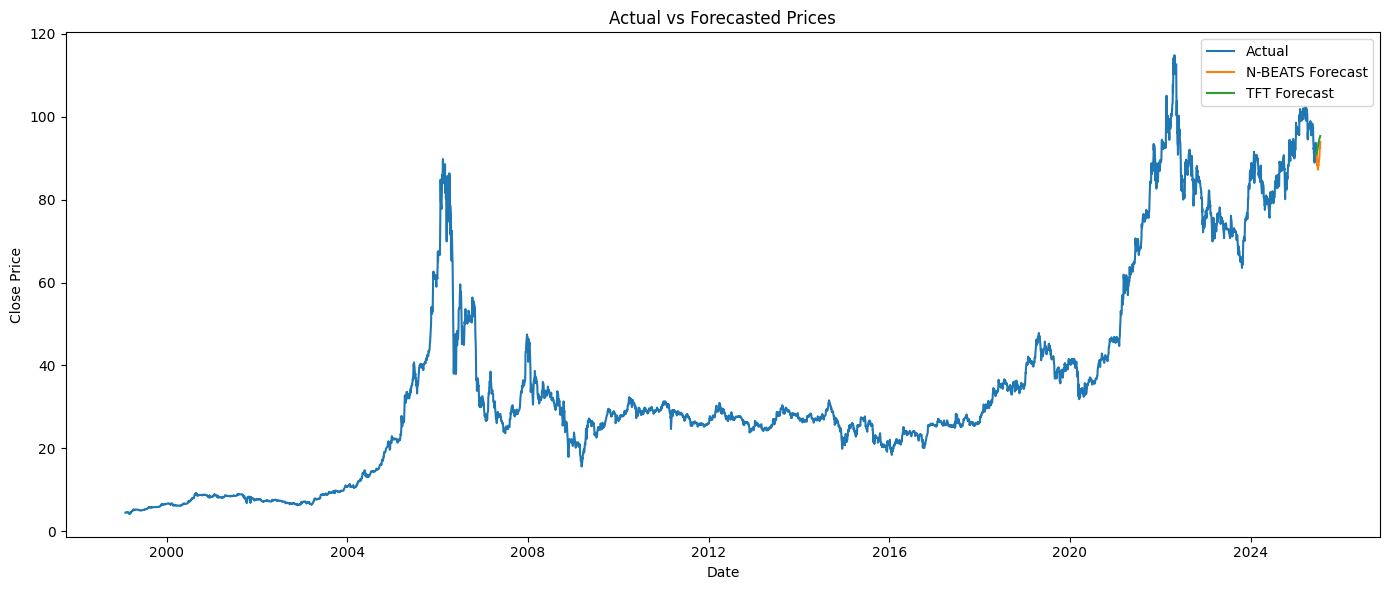

N-BEATS + TFT Forecasts:
   unique_id         ds     NBEATS        TFT
25       ts1 2025-07-13  92.664841  94.907570
26       ts1 2025-07-14  93.163788  94.983307
27       ts1 2025-07-15  92.386559  95.066994
28       ts1 2025-07-16  93.905960  95.170052
29       ts1 2025-07-17  93.890839  95.302376


In [ ]:
from neuralforecast.models import NBEATS, TFT
from neuralforecast.core import NeuralForecast
from neuralforecast.losses.pytorch import MSE
# ---- N-BEATS + TFT Models ----
df_nf = df_full_timed.reset_index()[['time', 'close']].rename(columns={'time': 'ds', 'close': 'y'})
df_nf['unique_id'] = 'ts1'
df_nf = df_nf[['unique_id', 'ds', 'y']]

models = [
    NBEATS(h=30, input_size=90, loss=MSE(), max_steps=1000),
    TFT(h=30, input_size=90, loss=MSE(), max_steps=1000)
]

forecast = NeuralForecast(models=models, freq='D')
forecast.fit(df_nf)
preds = forecast.predict()

# ---- Plot Actual vs Predicted (N-BEATS + TFT) ----
plt.figure(figsize=(14, 6))
plt.plot(df_nf['ds'], df_nf['y'], label='Actual')
plt.plot(preds['ds'], preds['NBEATS'], label='N-BEATS Forecast')
plt.plot(preds['ds'], preds['TFT'], label='TFT Forecast')
plt.title('Actual vs Forecasted Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()
plt.show()


print("N-BEATS + TFT Forecasts:")
print(preds.tail())

# Saving Best Model For Deployment

In [164]:
# Train CNN
cnn_model = CNN1D(X_train.shape[1])
cnn_metrics = train_dl_model(cnn_model, train_loader, X_val_t, y_val_t)

# Save the model
torch.save(cnn_model.state_dict(), "cnn_model.pt")


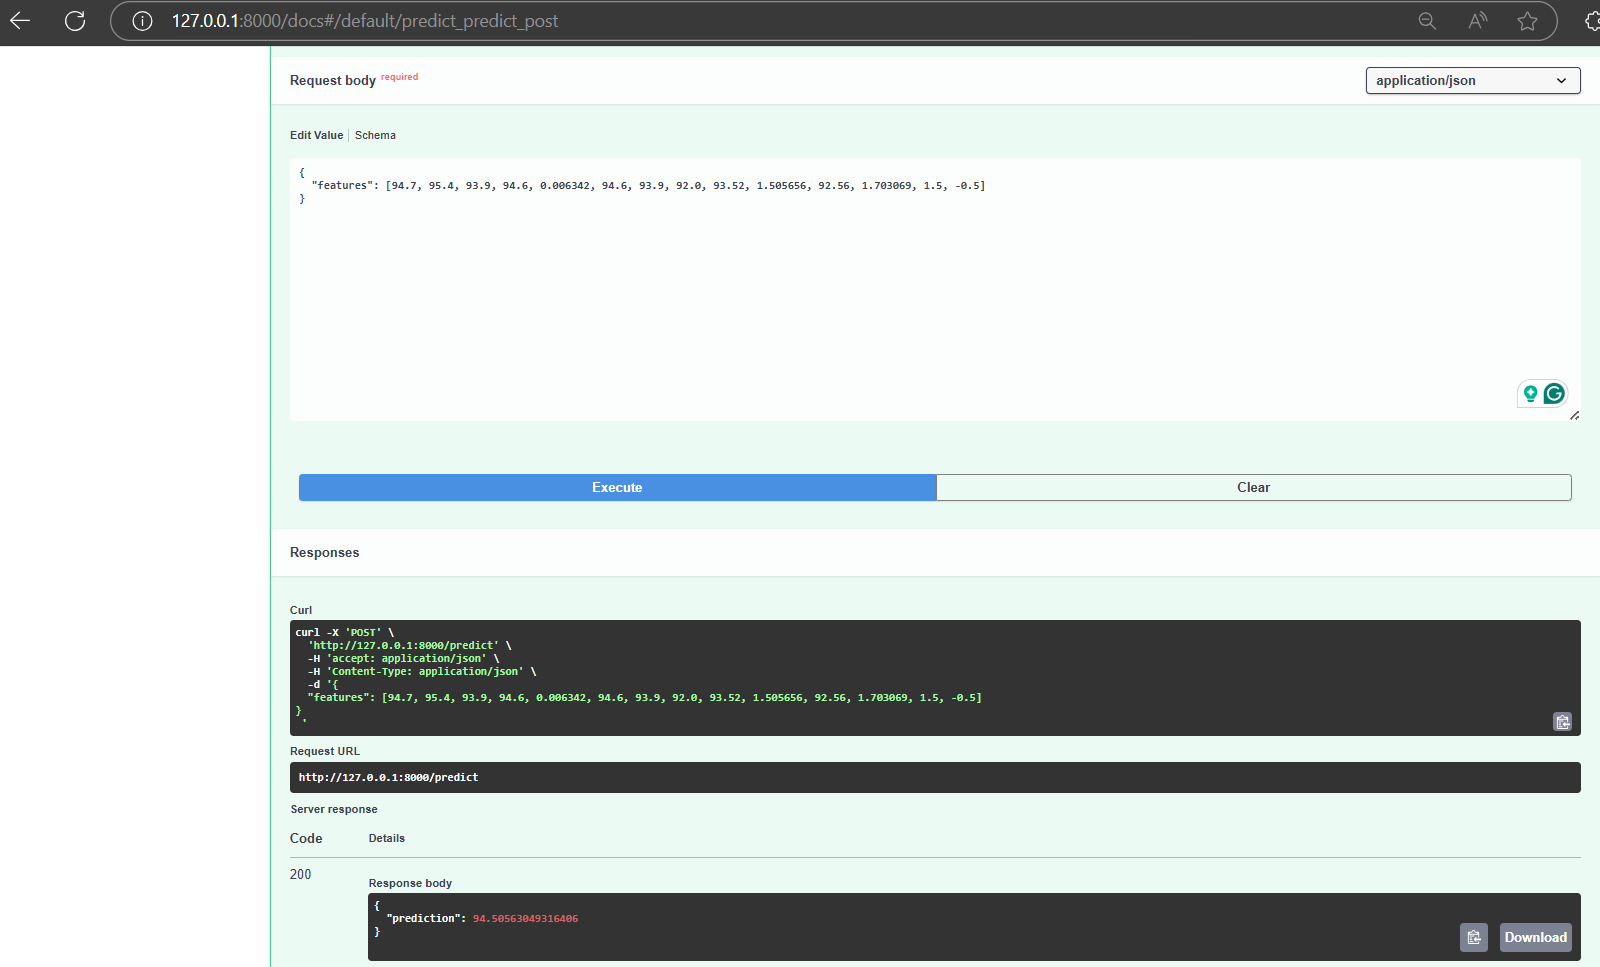